1.Download the dataset

2.Load the dataset into the tool



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# for visualizations first deal with null values

# 5Q - Check for Missing values and deal with them.

In [8]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [9]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [10]:
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [13]:
df['sex']=df['sex'].replace(".","MALE")

In [14]:
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [17]:
df['sex']=df['sex'].fillna('MALE')

In [18]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [19]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [20]:
df = df.fillna(df.median())

<ipython-input-20-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [22]:
df.isnull().sum() #all null values cleared

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [23]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


# Q3 - VISULIZATIONS

3.1 - UNI VARIATE ANALYSIS


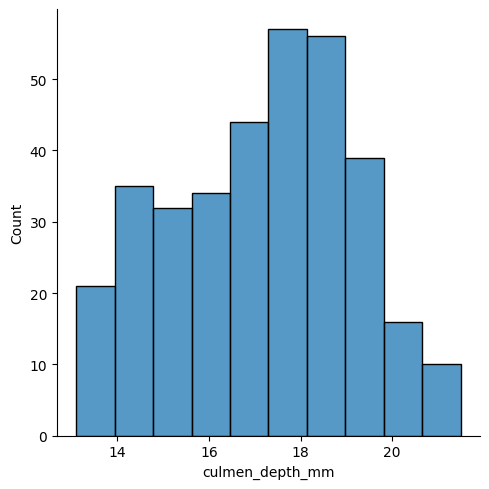

In [27]:
sns.displot(df.culmen_depth_mm)

<ipython-input-28-ae65ebdd98e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.flipper_length_mm	)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

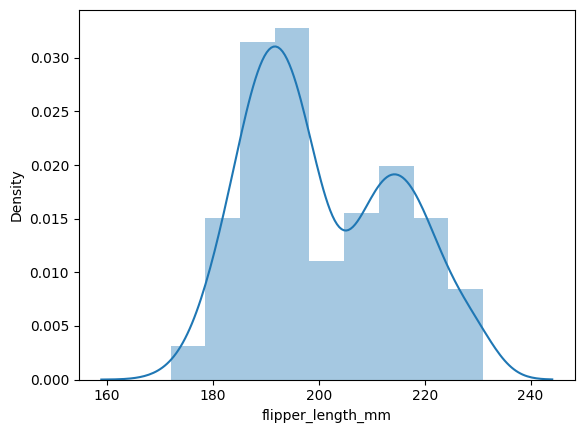

In [28]:
sns.distplot(df.flipper_length_mm	)

3.2 - BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

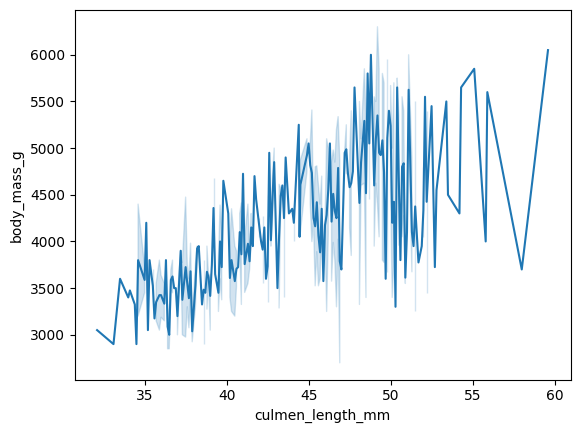

In [31]:
sns.lineplot(x=df.culmen_length_mm,y=df.body_mass_g	)

# 3.3 MUTI VARIATE ANALYSIS

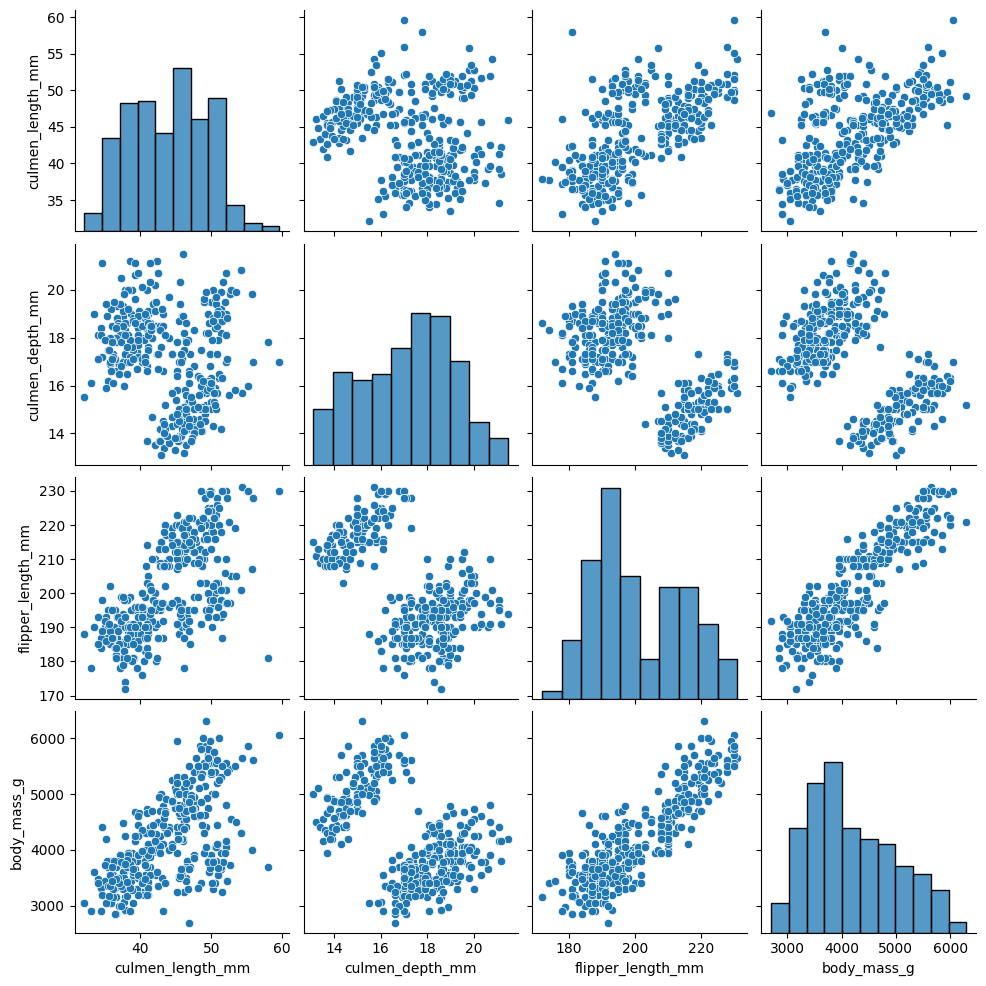

In [35]:
sns.pairplot(df)

<ipython-input-36-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

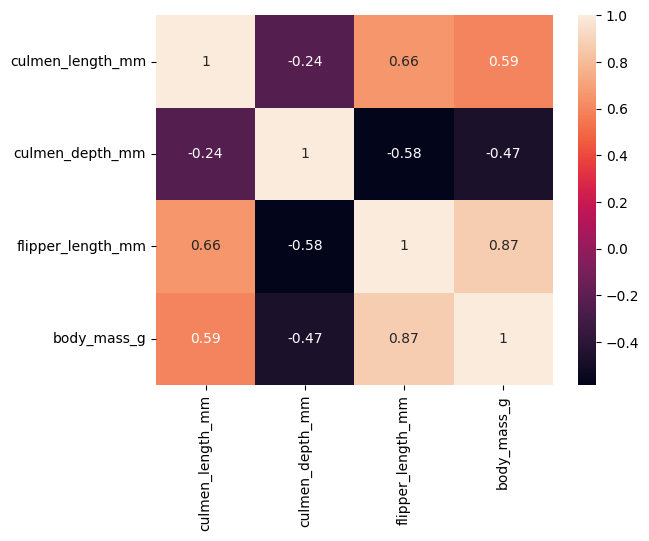

In [36]:
sns.heatmap(df.corr(),annot = True)

Q4-Perform descriptive statistics on the dataset

In [38]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Q6-Find the outliers and replace them outliers

no outliers

<Axes: >

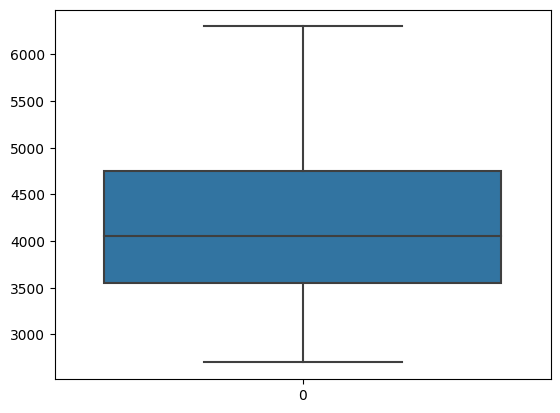

In [46]:
sns.boxplot(df.body_mass_g)

no outliers

<Axes: >

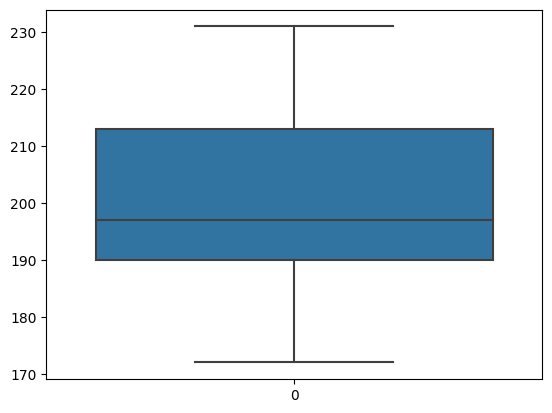

In [47]:
sns.boxplot(df.flipper_length_mm	)

no outliers

<Axes: >

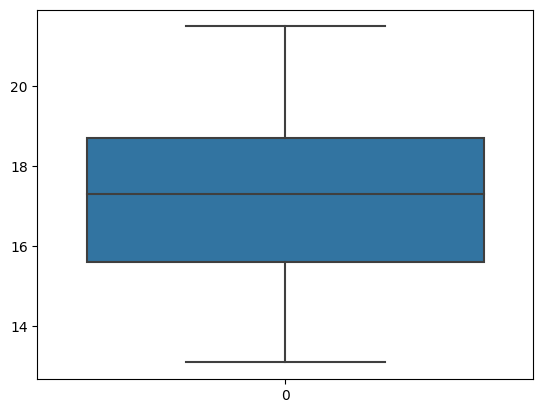

In [48]:
sns.boxplot(df.culmen_depth_mm)

no outliers

<Axes: >

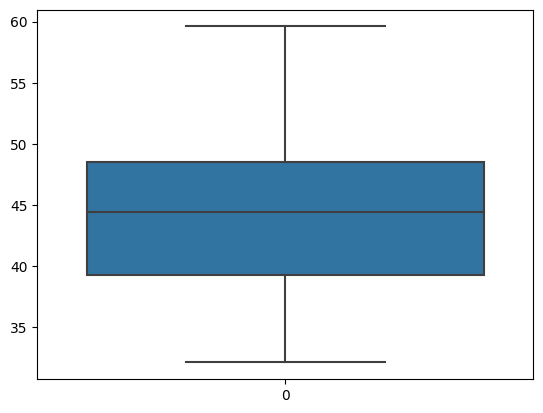

In [49]:
sns.boxplot(df.culmen_length_mm)

# 7.Check the correlation of independent variables with the target


In [51]:
X =df.drop(columns =['species'],axis =1)

In [53]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


# 8.Check for Categorical columns and perform encoding.


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
X.island = le.fit_transform(df.island)
X.sex = le.fit_transform(df.island)

In [60]:
X.tail()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,0,44.45,17.3,197.0,4050.0,0
340,0,46.80,14.3,215.0,4850.0,0
341,0,50.40,15.7,222.0,5750.0,0
342,0,45.20,14.8,212.0,5200.0,0
343,0,49.90,16.1,213.0,5400.0,0


# 9.Split the data into dependent and independent variables.

In [64]:
y = df['species']   #independent variable

In [65]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [69]:
X =df.drop(columns =['species'],axis =1)
X.head()


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,2
2,2,40.30,18.0,195.0,3250.0,2
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,2


# Q10 - Scaling the data

In [70]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [71]:

X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,1.0
2,1.0,0.298182,0.583333,0.389831,0.152778,1.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,1.0


# Q11- Split the data into training and testing

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

# Q12.check the training and testing data shape

In [73]:
X_train.shape


(240, 6)

In [74]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
258,0.0,0.432727,0.059524,0.610169,0.458333,0.0
332,0.0,0.414545,0.250000,0.694915,0.541667,0.0
121,1.0,0.203636,0.797619,0.440678,0.222222,1.0
61,0.0,0.334545,0.952381,0.389831,0.472222,0.0
70,1.0,0.050909,0.702381,0.305085,0.250000,1.0


In [79]:
X_test.shape

(104, 6)

In [78]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
258,0.0,0.432727,0.059524,0.610169,0.458333,0.0
332,0.0,0.414545,0.250000,0.694915,0.541667,0.0
121,1.0,0.203636,0.797619,0.440678,0.222222,1.0
61,0.0,0.334545,0.952381,0.389831,0.472222,0.0
70,1.0,0.050909,0.702381,0.305085,0.250000,1.0
